<a href="https://colab.research.google.com/github/GeisilaCosta/challengeTelecomX/blob/main/Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas requests

In [3]:
import pandas as pd
import requests

# URL da API (substitua pelo link correto se necessário)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Fazendo a requisição
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()  # Converte a resposta em JSON
    print("Dados carregados com sucesso!")
else:
    print(f"Erro ao carregar os dados. Código de status: {response.status_code}")

    # Lê o arquivo JSON e converte em DataFrame
df = pd.read_json(url)

Dados carregados com sucesso!


In [4]:
# Primeiras linhas para visualizar o conteúdo
print(df.head())

# Ver todas as colunas disponíveis
print(df.columns)

# Ver o shape (linhas, colunas)
print(f"O DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

# Tipos de dados de cada coluna
print(df.dtypes)

# Informações gerais: tipos, não-nulos, memória usada
print(df.info())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [6]:
# Expandir colunas com dicionários
df_expanded = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),
    df['customer'].apply(pd.Series),
    df['phone'].apply(pd.Series),
    df['internet'].apply(pd.Series),
    df['account'].apply(pd.Series)
], axis=1)

# Verificar as novas colunas
print(df_expanded.head())
print(df_expanded.info())


   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
0          Yes            No             DSL             No          Yes   
1          Yes           Yes             DSL             No           No   
2          Yes            No     Fiber optic             No           No   
3          Yes            No     Fiber optic             No          Yes   
4          Yes            No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No        

In [7]:
# Expandir a coluna Charges em duas colunas separadas
charges_df = df_expanded['Charges'].apply(pd.Series)

# Concatenar com o dataframe original e remover a antiga
df_expanded = pd.concat([df_expanded.drop(columns=['Charges']), charges_df.rename(columns={
    'Monthly': 'MonthlyCharges',
    'Total': 'TotalCharges'
})], axis=1)

# Converter TotalCharges para numérico (alguns valores podem ser espaços vazios)
df_expanded['TotalCharges'] = pd.to_numeric(df_expanded['TotalCharges'], errors='coerce')


In [8]:
# Valores nulos
print("Valores nulos por coluna:")
print(df_expanded.isnull().sum())

# Ver registros duplicados
print(f"\nRegistros duplicados: {df_expanded.duplicated().sum()}")


Valores nulos por coluna:
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

Registros duplicados: 0


In [9]:
# Estatísticas das variáveis numéricas
print(df_expanded[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


            tenure  MonthlyCharges  TotalCharges
count  7267.000000     7267.000000   7256.000000
mean     32.346498       64.720098   2280.634213
std      24.571773       30.129572   2268.632997
min       0.000000       18.250000     18.800000
25%       9.000000       35.425000    400.225000
50%      29.000000       70.300000   1391.000000
75%      55.000000       89.875000   3785.300000
max      72.000000      118.750000   8684.800000


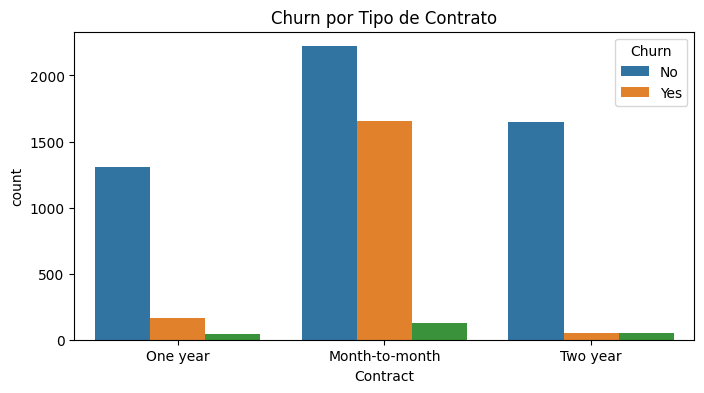

In [10]:
# Exemplo: proporção de clientes que cancelaram por tipo de contrato
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(data=df_expanded, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.show()


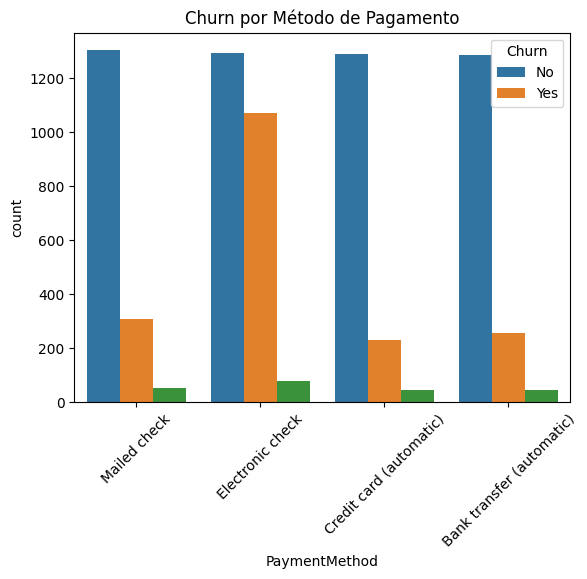

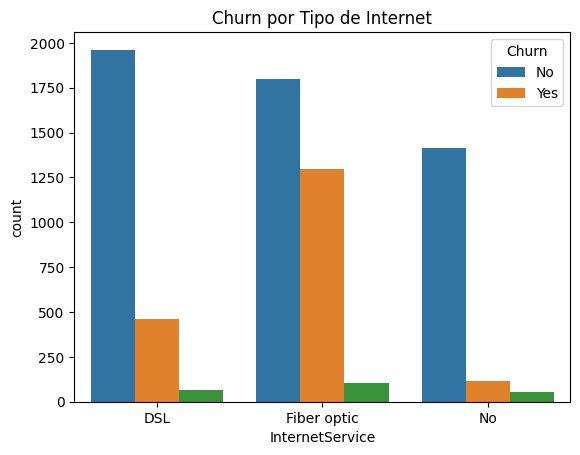

In [11]:
# Churn por método de pagamento
sns.countplot(data=df_expanded, x='PaymentMethod', hue='Churn')
plt.title('Churn por Método de Pagamento')
plt.xticks(rotation=45)
plt.show()

# Churn por InternetService
sns.countplot(data=df_expanded, x='InternetService', hue='Churn')
plt.title('Churn por Tipo de Internet')
plt.show()


In [13]:
# Converter TotalCharges na df_expanded para numérico (alguns valores podem ser espaços vazios)
# A coluna já foi renomeada para TotalCharges na expansão anterior
df_expanded['TotalCharges'] = pd.to_numeric(df_expanded['TotalCharges'], errors='coerce')

# Substituir variações "No internet service"/"No phone service" por "No" na df_expanded
# Estas colunas já foram expandidas na df_expanded
for col in ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    # Verifica se a coluna existe na df_expanded antes de tentar substituir
    if col in df_expanded.columns:
        df_expanded[col] = df_expanded[col].replace({'No internet service':'No', 'No phone service':'No'})
    else:
        print(f"A coluna '{col}' não foi encontrada na df_expanded.")


# Verificar tipos, nulos, estatísticas na df_expanded
print(df_expanded.dtypes)
print(df_expanded.isnull().sum())
# A coluna de churn está na df_expanded
print(df_expanded[['tenure','MonthlyCharges','TotalCharges']].describe())
print(df_expanded['Churn'].value_counts(normalize=True))


customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
Paperle

In [14]:
print(df_expanded['Churn'].unique())


['No' 'Yes' '']


In [15]:
# Remover espaços em branco da coluna Churn
df_expanded['Churn'] = df_expanded['Churn'].str.strip()

# Confirmar novamente os valores únicos
print(df_expanded['Churn'].unique())


['No' 'Yes' '']


In [16]:
df_expanded[df_expanded['TotalCharges'].isnull()][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']]


,customerID,tenure,MonthlyCharges,TotalCharges
975,1371-DWPAZ,0,56.05,NaN
1775,2520-SGTTA,0,20.00,NaN
1955,2775-SEFEE,0,61.90,NaN
2075,2923-ARZLG,0,19.70,NaN
2232,3115-CZMZD,0,20.25,NaN
2308,3213-VVOLG,0,25.35,NaN
2930,4075-WKNIU,0,73.35,NaN
3134,4367-NUYAO,0,25.75,NaN
3203,4472-LVYGI,0,52.55,NaN
4169,5709-LVOEQ,0,80.85,NaN


In [17]:
# Verificar valores ausentes por coluna
print(df_expanded.isnull().sum().sort_values(ascending=False))


TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
customerID           0
Partner              0
Dependents           0
PhoneService         0
tenure               0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
MultipleLines        0
DeviceProtection     0
TechSupport          0
StreamingMovies      0
StreamingTV          0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
dtype: int64


In [18]:
df_expanded = df_expanded[df_expanded['TotalCharges'].notnull()]


In [19]:
df_expanded['TotalCharges'] = df_expanded['TotalCharges'].fillna(0)


In [20]:
# Verificar duplicatas no DataFrame
duplicatas = df_expanded.duplicated()
print(f"Número de registros duplicados: {duplicatas.sum()}")

# Ver as duplicatas, se houver
df_expanded[duplicatas]


Número de registros duplicados: 0


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [21]:
# Remover espaços extras de todas as colunas tipo 'object'
for col in df_expanded.select_dtypes(include='object').columns:
    df_expanded[col] = df_expanded[col].str.strip()


In [22]:
# Listar valores únicos por coluna categórica
for col in df_expanded.select_dtypes(include='object').columns:
    print(f"\nColuna: {col}")
    print(df_expanded[col].value_counts())



Coluna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7256, dtype: int64

Coluna: Churn
Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64

Coluna: gender
gender
Male      3669
Female    3587
Name: count, dtype: int64

Coluna: Partner
Partner
No     3747
Yes    3509
Name: count, dtype: int64

Coluna: Dependents
Dependents
No     5086
Yes    2170
Name: count, dtype: int64

Coluna: PhoneService
PhoneService
Yes    6551
No      705
Name: count, dtype: int64

Coluna: MultipleLines
MultipleLines
No     4195
Yes    3061
Name: count, dtype: int64

Coluna: InternetService
InternetService
Fiber optic    3198
DSL            2483
No             1575
Name: count, dtype: int64

Coluna: OnlineSecurity
OnlineSecurity
No     5182
Yes    2074
Name: count, dtype: int64

Coluna: OnlineBackup
OnlineBackup
No     4756


In [23]:
# Uniformizar valores binários para Yes/No
binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binarias:
    df_expanded[col] = df_expanded[col].replace({'Yes': 'Yes', 'No': 'No'})  # redundante, mas ajuda se houve erro

# Uniformizar categoria 'gender' se necessário
df_expanded['gender'] = df_expanded['gender'].str.capitalize()


In [24]:
# Remover registros com TotalCharges nulo
df_expanded = df_expanded[df_expanded['TotalCharges'].notnull()]


In [25]:
# Remover duplicatas
df_expanded = df_expanded.drop_duplicates()


In [26]:
# Remover espaços em branco nas colunas de texto
for col in df_expanded.select_dtypes(include='object').columns:
    df_expanded[col] = df_expanded[col].str.strip()


In [27]:
# Substituir 'No internet service' e 'No phone service' por 'No'
cols_binarias = ['MultipleLines','OnlineSecurity','OnlineBackup',
                 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for col in cols_binarias:
    df_expanded[col] = df_expanded[col].replace({'No internet service':'No', 'No phone service':'No'})

# Corrigir possíveis erros em Churn
df_expanded['Churn'] = df_expanded['Churn'].str.strip()


In [28]:
# Verificar tipos
print(df_expanded.dtypes[['MonthlyCharges', 'TotalCharges', 'tenure']])


MonthlyCharges    float64
TotalCharges      float64
tenure              int64
dtype: object


In [29]:
df_expanded['TotalCharges'] = pd.to_numeric(df_expanded['TotalCharges'], errors='coerce')


In [30]:
print("✔️ Valores nulos:")
print(df_expanded.isnull().sum())

print("\n✔️ Registros duplicados:")
print(df_expanded.duplicated().sum())

print("\n✔️ Valores únicos em 'Churn':")
print(df_expanded['Churn'].value_counts())


✔️ Valores nulos:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

✔️ Registros duplicados:
0

✔️ Valores únicos em 'Churn':
Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64


In [31]:
# Remover registros com Churn vazio ou nulo
df_expanded = df_expanded[df_expanded['Churn'].isin(['Yes', 'No'])]


In [32]:
print(df_expanded['Churn'].value_counts())


Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [33]:
print(df_expanded.isnull().sum().sum())        # Total de valores nulos (deve ser 0)
print(df_expanded.duplicated().sum())          # Total de duplicados (deve ser 0)
print(df_expanded['Churn'].unique())           # Deve retornar apenas ['No', 'Yes']


0
0
['No' 'Yes']


In [34]:
df_expanded['Contas_Diarias'] = df_expanded['MonthlyCharges'] / 30


In [35]:
# Criar coluna 'Contas_Diarias'
df_expanded['Contas_Diarias'] = df_expanded['MonthlyCharges'] / 30

# Verificar as primeiras linhas
print(df_expanded[['MonthlyCharges', 'Contas_Diarias']].head())


   MonthlyCharges  Contas_Diarias
0            65.6        2.186667
1            59.9        1.996667
2            73.9        2.463333
3            98.0        3.266667
4            83.9        2.796667


In [36]:
print(df_expanded['Contas_Diarias'].describe())


count    7032.000000
mean        2.159940
std         1.002866
min         0.608333
25%         1.186250
50%         2.345000
75%         2.995417
max         3.958333
Name: Contas_Diarias, dtype: float64


In [37]:
print(df_expanded[['MonthlyCharges', 'Contas_Diarias']].sample(5))
print("Valores nulos em Contas_Diarias:", df_expanded['Contas_Diarias'].isnull().sum())


      MonthlyCharges  Contas_Diarias
292            20.55        0.685000
2196           82.30        2.743333
2565           24.20        0.806667
227           106.30        3.543333
1390           19.35        0.645000
Valores nulos em Contas_Diarias: 0
